# **Visualización del flujo de un campo vectorial sobre diferentes superficies**

## **Introducción**
Los campos vectoriales son herramientas fundamentales en la física y la ingeniería, utilizados para describir fenómenos como campos eléctricos, magnéticos, velocidad de fluidos, entre otros. El flujo de un campo vectorial a través de una superficie \( S \) es una medida de cuánto del campo atraviesa dicha superficie.  

En este proyecto, implementamos una visualización interactiva que permite cambiar la superficie y observar cómo varía el flujo del campo vectorial.  

## **Objetivo**
Desarrollar una representación gráfica del flujo de un campo vectorial \( F(x, y, z) \) sobre diferentes superficies en un espacio tridimensional. Se busca facilitar la comprensión del Teorema de Gauss y la interpretación geométrica de la divergencia.  

## **Definición del problema**
Dado un campo vectorial \( F(x, y, z) = (y, -x, z) \), se desea analizar su flujo sobre diferentes superficies cerradas y orientadas:

- **Esfera**: $( x^2 + y^2 + z^2 = 1 )$
- **Cilindro**: $( x^2 + y^2 = 1 ), con ( z ) en ([-1,1])$
- **Plano**: $( z = 0 ) en el rango ([-1,1] times [-1,1]) $

La animación permite seleccionar la superficie y visualizar cómo se comporta el campo vectorial en cada caso.



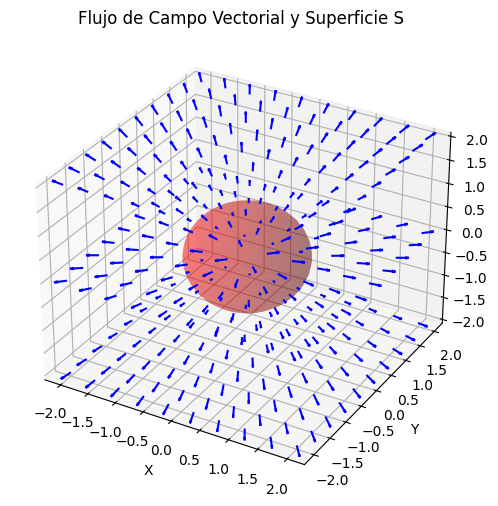

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el campo vectorial F(x, y, z) = (P, Q, R)
def F(x, y, z):
    P = x  # Componente en x
    Q = y  # Componente en y
    R = z  # Componente en z
    return P, Q, R

# Crear una malla de puntos en el espacio
x, y, z = np.meshgrid(np.linspace(-2, 2, 10),
                      np.linspace(-2, 2, 10),
                      np.linspace(-2, 2, 3))

# Calcular las componentes del campo vectorial
u, v, w = F(x, y, z)

# Graficar el campo vectorial
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Dibujar vectores en la malla
ax.quiver(x, y, z, u, v, w, length=0.2, normalize=True, color='b')

# Dibujar la superficie S (Esfera para ilustrar el flujo)
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2*np.pi, 40)
phi, theta = np.meshgrid(phi, theta)

X = np.sin(phi) * np.cos(theta)
Y = np.sin(phi) * np.sin(theta)
Z = np.cos(phi)

ax.plot_surface(X, Y, Z, color='r', alpha=0.3)  # Superficie S

# Configurar etiquetas
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Flujo de Campo Vectorial y Superficie S')

plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Definir el campo vectorial F(x, y, z) = (P, Q, R)
def F(x, y, z):
    P = y  # Componente en x
    Q = -x  # Componente en y
    R = z  # Componente en z
    return P, Q, R

# Función para graficar el campo vectorial y la superficie seleccionada
def plot_vector_field(surface_type):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Crear una malla para visualizar los vectores en el espacio
    x, y, z = np.meshgrid(np.linspace(-2, 2, 10),
                          np.linspace(-2, 2, 10),
                          np.linspace(-2, 2, 3))

    u, v, w = F(x, y, z)

    # Dibujar vectores en la malla
    ax.quiver(x, y, z, u, v, w, length=0.2, normalize=True, color='b')

    # Dibujar la superficie seleccionada
    if surface_type == 'Esfera':
        phi = np.linspace(0, np.pi, 20)
        theta = np.linspace(0, 2*np.pi, 40)
        phi, theta = np.meshgrid(phi, theta)
        X = np.sin(phi) * np.cos(theta)
        Y = np.sin(phi) * np.sin(theta)
        Z = np.cos(phi)

    elif surface_type == 'Cilindro':
        theta = np.linspace(0, 2*np.pi, 40)
        z_vals = np.linspace(-1, 1, 20)
        theta, z_vals = np.meshgrid(theta, z_vals)
        X = np.cos(theta)
        Y = np.sin(theta)
        Z = z_vals

    elif surface_type == 'Plano':
        X, Y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
        Z = np.zeros_like(X)

    ax.plot_surface(X, Y, Z, color='r', alpha=0.3)  # Superficie en rojo y transparente

    # Configurar etiquetas
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Flujo de Campo Vectorial sobre {surface_type}')

    plt.show()

# Widget interactivo para cambiar la superficie
surface_selector = widgets.Dropdown(
    options=['Esfera', 'Cilindro', 'Plano'],
    value='Esfera',
    description='Superficie:',
    disabled=False,
)

# Mostrar el gráfico con la opción seleccionada
display(surface_selector)
widgets.interactive(plot_vector_field, surface_type=surface_selector)

Dropdown(description='Superficie:', options=('Esfera', 'Cilindro', 'Plano'), value='Esfera')

interactive(children=(Dropdown(description='Superficie:', options=('Esfera', 'Cilindro', 'Plano'), value='Esfe…

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output

# Output para mostrar la figura
output = widgets.Output()

# Definir el campo vectorial F(x, y, z) = (P, Q, R)
def campo_vectorial(x, y, z):
    P = y
    Q = -x
    R = z
    return P, Q, R

# Generar la malla para el campo vectorial
def generar_campo(densidad):
    x = np.linspace(-1, 1, densidad)
    y = np.linspace(-1, 1, densidad)
    z = np.linspace(-1, 1, densidad)
    X, Y, Z = np.meshgrid(x, y, z)
    U, V, W = campo_vectorial(X, Y, Z)
    return X, Y, Z, U, V, W

# Generar diferentes superficies
def generar_superficie(tipo):
    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, np.pi, 30)

    if tipo == "Esfera":
        x = np.outer(np.cos(u), np.sin(v))
        y = np.outer(np.sin(u), np.sin(v))
        z = np.outer(np.ones(np.size(u)), np.cos(v))

    elif tipo == "Cilindro":
        x = np.outer(np.cos(u), np.ones(len(v)))
        y = np.outer(np.sin(u), np.ones(len(v)))
        z = np.outer(np.ones(len(u)), np.linspace(-1, 1, len(v)))

    elif tipo == "Plano":
        x = np.linspace(-1, 1, 30)
        y = np.linspace(-1, 1, 30)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)
        return X, Y, Z

    return x, y, z

# Función de actualización interactiva
def actualizar(tipo, densidad, angulo_x, angulo_y):
    with output:
        clear_output(wait=True)

        # Crear figura
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.set_zlim([-1, 1])

        # Generar y graficar la superficie
        X, Y, Z = generar_superficie(tipo)
        ax.plot_surface(X, Y, Z, color='r', alpha=0.5)

        # Generar y graficar el campo vectorial
        X, Y, Z, U, V, W = generar_campo(densidad)
        ax.quiver(X, Y, Z, U, V, W, length=0.15, color='b')

        # Configurar ángulos de vista
        ax.view_init(angulo_x, angulo_y)

        plt.show()

# Widgets interactivos
tipo_superficie = widgets.Dropdown(
    options=["Esfera", "Cilindro", "Plano"],
    value="Esfera",
    description="Superficie:"
)

densidad_flechas = widgets.IntSlider(
    min=5, max=20, step=1, value=10,
    description="Densidad:"
)

angulo_x = widgets.IntSlider(
    min=0, max=90, step=5, value=30,
    description="Ángulo X:"
)

angulo_y = widgets.IntSlider(
    min=0, max=360, step=10, value=45,
    description="Ángulo Y:"
)

# Mostrar interfaz interactiva y salida
display(widgets.VBox([tipo_superficie, densidad_flechas, angulo_x, angulo_y, output]))
widgets.interactive_output(actualizar, {"tipo": tipo_superficie, "densidad": densidad_flechas, "angulo_x": angulo_x, "angulo_y": angulo_y})


Output()

## **Resultados**
Se genera una gráfica en 3D que muestra:  

✅ El **campo vectorial** representado por flechas en un espacio tridimensional.  
✅ La **superficie seleccionada** (esfera, cilindro o plano), resaltada en color rojo y semitransparente.  
✅ Una interacción dinámica mediante un menú desplegable, que permite cambiar la superficie y actualizar la visualización en tiempo real.  

## **Conclusión**
Esta herramienta interactiva facilita la comprensión del flujo de un campo vectorial sobre diferentes superficies. Además, permite explorar visualmente la relación entre la orientación de la superficie y la dirección del campo.  

La implementación con **ipywidgets** en **Jupyter Notebook** o **Google Colab** mejora la experiencia al ofrecer una interacción en tiempo real, promoviendo el aprendizaje intuitivo del Teorema de Gauss y el concepto de divergencia.  

### **Referencias**
- Griffiths, D. J. (2013). *Introduction to Electrodynamics* (4th ed.). Pearson.  
- Stewart, J. (2020). *Cálculo de Varias Variables* (8th ed.). Cengage Learning.  
- Marsden, J. E., & Tromba, A. J. (2004). *Vector Calculus* (5th ed.). W. H. Freeman.  
